<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Logistic%20Regression/Regress%C3%A3o_Log%C3%ADstica_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris

X, y = load_iris( return_X_y=True, as_frame=True )

## **Regressão Logística Binária**

In [8]:
# Considerando apenas a coluna 'petal width (cm)' e os targets 0 e 1
X = X.loc[ y.isin( [0,1] ), 'petal width (cm)' ].values
y = y [ y.isin( [0,1] ) ].values

In [9]:
# Separando entre dados de treino e teste
from sklearn.model_selection  import train_test_split

X_train, X_teste, y_train, y_teste = train_test_split( X, y, test_size = 0.33, random_state = 42 )

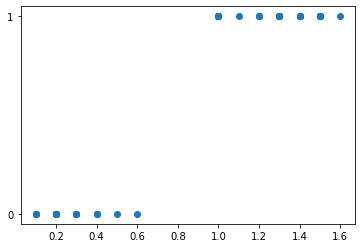

In [11]:
# Visualizando graficamente
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter( X_train, y_train )
ax.set( yticks=[0,1] )

plt.show()

In [13]:
# importando a Regressão Logística
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression( random_state = 0).fit( X_train.reshape( -1, 1 ), y_train )

In [21]:
# Coeficiente Angular
modelo.coef_
coeficiente = modelo.coef_[0][0]
coeficiente

3.8510361317501483

In [22]:
# Coeficiente Linear
modelo.intercept_
intercepto = modelo.intercept_[0]
intercepto

-2.8324818985056455

In [16]:
# Importanto o expit
from scipy.special import expit

In [18]:
# Importando o Numpy e gerando um array de 0 a 2
import numpy as np

valores_X = np.linspace( X_train.min(), X_train.max(), 100 )

In [23]:
# Calcular o valor para cada y
valores_y = expit( valores_X * coeficiente + intercepto )

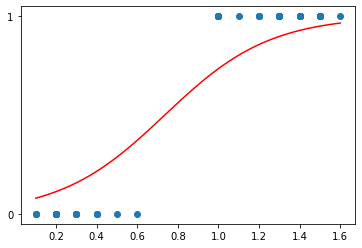

In [26]:
# Visualizando Graficamente

fig, ax = plt.subplots()

ax.scatter( X_train, y_train )
ax.plot( valores_X, valores_y, color='red' )

ax.set( yticks=[0,1])

plt.show()

In [31]:
# Fazendo a previsão das probabilidades
modelo.predict_proba( X_train.reshape( -1, 1 ) )[0:5]

array([[0.88718204, 0.11281796],
       [0.26530911, 0.73469089],
       [0.78449692, 0.21550308],
       [0.05001742, 0.94998258],
       [0.07182627, 0.92817373]])

In [37]:
# Utilizando a base de testes
y_prev = modelo.predict_proba( X_teste.reshape( -1, 1 ) )
y_prev[:, 1]

array([0.96541627, 0.89787791, 0.98368761, 0.15747043, 0.21550308,
       0.11281796, 0.11281796, 0.80276369, 0.11281796, 0.11281796,
       0.15747043, 0.11281796, 0.85677536, 0.11281796, 0.85677536,
       0.11281796, 0.92817373, 0.97620691, 0.07963048, 0.21550308,
       0.89787791, 0.89787791, 0.21550308, 0.11281796, 0.80276369,
       0.21550308, 0.15747043, 0.89787791, 0.07963048, 0.94998258,
       0.11281796, 0.11281796, 0.96541627])

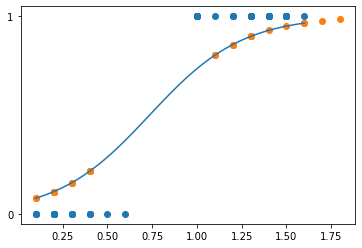

In [38]:
# Verificando graficamente

fig, ax = plt.subplots()

ax.scatter( X_train, y_train )
ax.plot( valores_X, valores_y )
ax.scatter( X_teste, y_prev[:, 1] )

ax.set( yticks=[0,1] )

plt.show()

In [40]:
# Fazendo apenas a previsão

y_pred_valor = modelo.predict( X_teste.reshape( -1, 1 ) )

In [41]:
# Avaliando o erro
from sklearn.metrics import confusion_matrix

confusion_matrix( y_teste, y_pred_valor )

array([[19,  0],
       [ 0, 14]])

## **Regressão Logística Multinomial**

In [2]:
# Importando novamente o dataset
X, y = load_iris( return_X_y=True, as_frame=True )

In [4]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_teste, y_train, y_teste = train_test_split( X, y, random_state = 42, test_size=0.33 )

In [8]:
# Criando novamente o classificador
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression( random_state = 0, max_iter=1000 ).fit( X_train, y_train )

In [9]:
# Verificando o coef
coeficiente = modelo.coef_
coeficiente

array([[-0.39000206,  0.85585748, -2.24397125, -0.95265144],
       [ 0.43966828, -0.36124807, -0.12427732, -0.77240525],
       [-0.04966622, -0.49460941,  2.36824858,  1.72505669]])

In [10]:
# Verificando o intercept
intercepto = modelo.intercept_
intercepto

array([  8.69267725,   2.11636906, -10.8090463 ])

In [11]:
# Fazendo a previsão das classes
y_pred = modelo.predict( X_teste )
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [12]:
# Avaliando o erro
from sklearn.metrics import confusion_matrix

confusion_matrix( y_teste, y_pred )


array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])